In [ ]:
%run C:\Users\Omar\Intern_Final_Project\notebooks\Data_Cleaning\Features_Selection.ipynb

---
### *A.<BR> Importing needed libraries*

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from lightgbm.sklearn import LGBMRegressor
import plotly as py
import plotly.graph_objs as go
import warnings                                  
warnings.filterwarnings('ignore')

---
### *B.<BR> Data Scalling*

In [4]:
def data_scale():   
     scaler = StandardScaler()
     for col in df_red:
           if col not in ["price"]:
                  df_red[col]=scaler.fit_transform(df_red[[col]])

     for col in df_green:
           if col not in ["price"]:
                  df_green[col]=scaler.fit_transform(df_green[[col]])

     for col in df_yellow:
           if col not in ["price"]:
                  df_yellow[col]=scaler.fit_transform(df_yellow[[col]])             


data_scale()

---
### *C.<BR> Quick Comparison between multiple models with the default parameters*

#### *C.1 <BR>Creating one function to use over the three datasets*

In [50]:
def train_test(data):
    tscv = TimeSeriesSplit(n_splits=4,max_train_size=16,test_size=4,gap=0)
    mae_scores = []
    y_pred_results=[]

    models_names=["DecisionTreeRegressor","RandomForestRegressor","SVR()","LinearRegression","XGBRegressor_boo",
                  "XGBRFRegressor_boo","AdaBoostRegressor_boo"]
              
    models=[DecisionTreeRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR(),LinearRegression(),XGBRegressor(random_state=0),
        XGBRFRegressor(random_state=0),AdaBoostRegressor(random_state=0)]


    test_data=data[-20:]
    time_series_data = test_data.values

    for model in models:
              for train_index, test_index in tscv.split(time_series_data):
                                  X_train, y_train = time_series_data[train_index, 1:], time_series_data[train_index, 0]
                                  X_test, y_test = time_series_data[test_index, 1:], time_series_data[test_index, 0]

                                  model.fit(X_train, y_train)
                                  y_pred = model.predict(X_test)
                                  y_pred_results.append(y_pred)
                                  mae = np.mean(mean_absolute_error(y_test, y_pred))
                                  mae_scores.append(mae)    
                                  outcome=pd.concat([pd.DataFrame(pd.DataFrame(y_pred_results[0:4]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[4:8]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[8:12]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[12:16]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[16:20]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[20:24]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(y_pred_results[24:28]).stack().reset_index(drop=True))],axis=1)
                                  new_date_index=pd.date_range(start="2023-07-16",end="2023-10-29",freq="W")
                                  new_date_index=pd.DataFrame({"date":new_date_index})
                                  outcome.columns=models_names
                                  outcome_all=pd.concat([outcome,new_date_index],axis=1).set_index("date")

                                  outcome_mae=pd.concat([pd.DataFrame(pd.DataFrame(mae_scores[0:4]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[4:8]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[8:12]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[12:16]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[16:20]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[20:24]).stack().reset_index(drop=True)),
                                  pd.DataFrame(pd.DataFrame(mae_scores[24:28]).stack().reset_index(drop=True))],axis=1)
                                  outcome_mae.columns=models_names
                                  
                                  




    return outcome_all,outcome_mae        

#### *C.2 <BR>Applying the function on the datasets*

In [51]:

df_red_outcomes=train_test(data=df_red)
df_green_outcomes=train_test(data=df_green)
df_yellow_outcomes=train_test(data=df_yellow)

#### *C.3 <br>Results Comparison*

#### *C.3.1<BR> Accuracy comparison condsidering mean absoulute error*

##### *C.3.1.1 <BR>df_red datata set*

In [52]:
pd.DataFrame(df_red_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score")

,index,score
6,AdaBoostRegressor_boo,2.242544
5,XGBRFRegressor_boo,2.263427
2,SVR(),2.390601
4,XGBRegressor_boo,2.397107
1,RandomForestRegressor,2.449592
0,DecisionTreeRegressor,2.579155
3,LinearRegression,2.643860


##### *C.3.1.2 <BR>df_green datata set*

In [53]:
pd.DataFrame(df_green_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score")

,index,score
6,AdaBoostRegressor_boo,1.999644
4,XGBRegressor_boo,2.023283
5,XGBRFRegressor_boo,2.027003
0,DecisionTreeRegressor,2.068038
2,SVR(),2.072525
1,RandomForestRegressor,2.080522
3,LinearRegression,2.182475


##### *C.3.1.3 <BR>df_yellow datata set*

In [54]:
pd.DataFrame(df_yellow_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score")

,index,score
0,DecisionTreeRegressor,2.940008
6,AdaBoostRegressor_boo,2.955728
3,LinearRegression,3.079869
2,SVR(),3.093130
1,RandomForestRegressor,3.168960
5,XGBRFRegressor_boo,3.169931
4,XGBRegressor_boo,3.181098


* *Results Visualization*

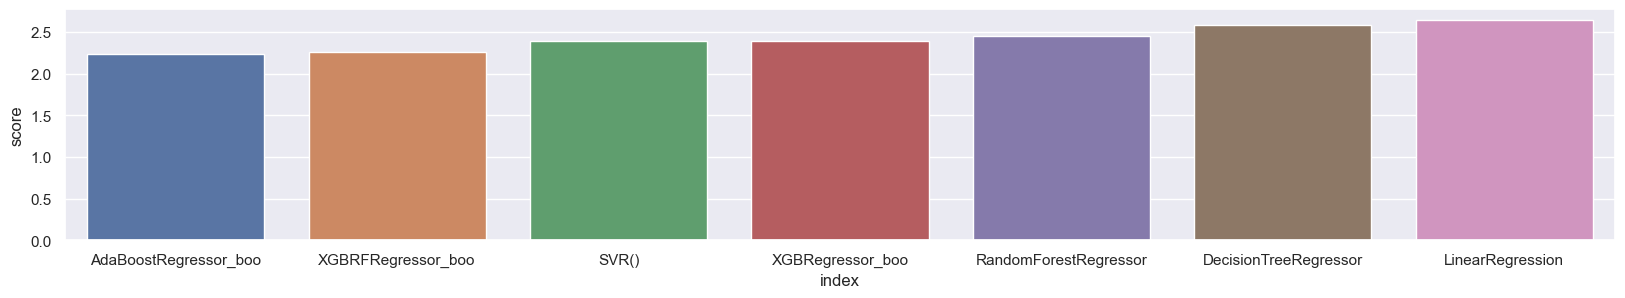

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(df_red_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

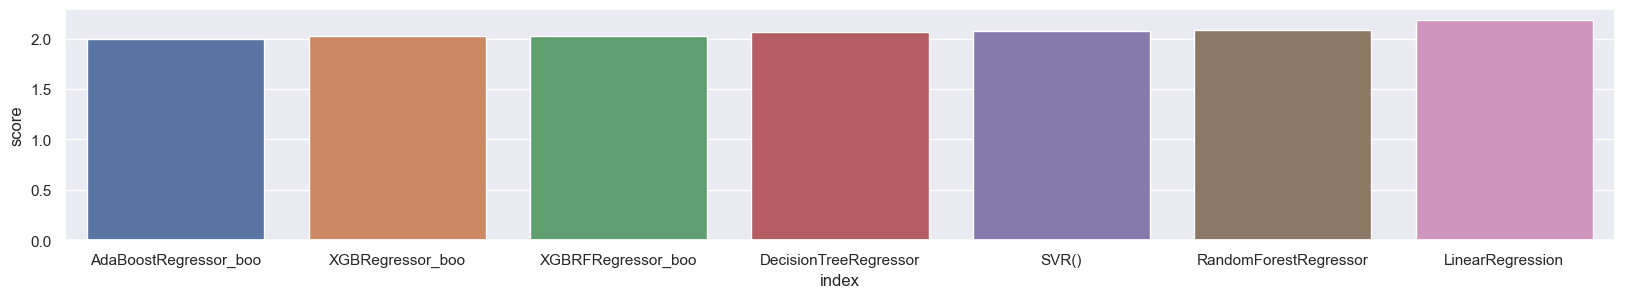

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(df_green_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

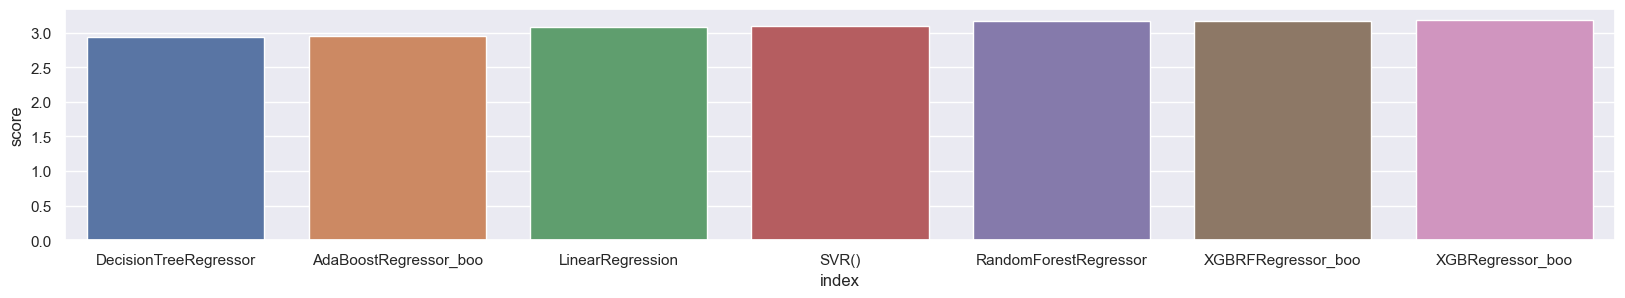

In [57]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(data=pd.DataFrame(df_yellow_outcomes[1].mean(),columns=['score']).reset_index().sort_values(by="score"),x="index",y="score");

##### *C.3.2<BR> Outcome comparison-visualization*

##### *C.3.2.1 <BR>df_red datata set*

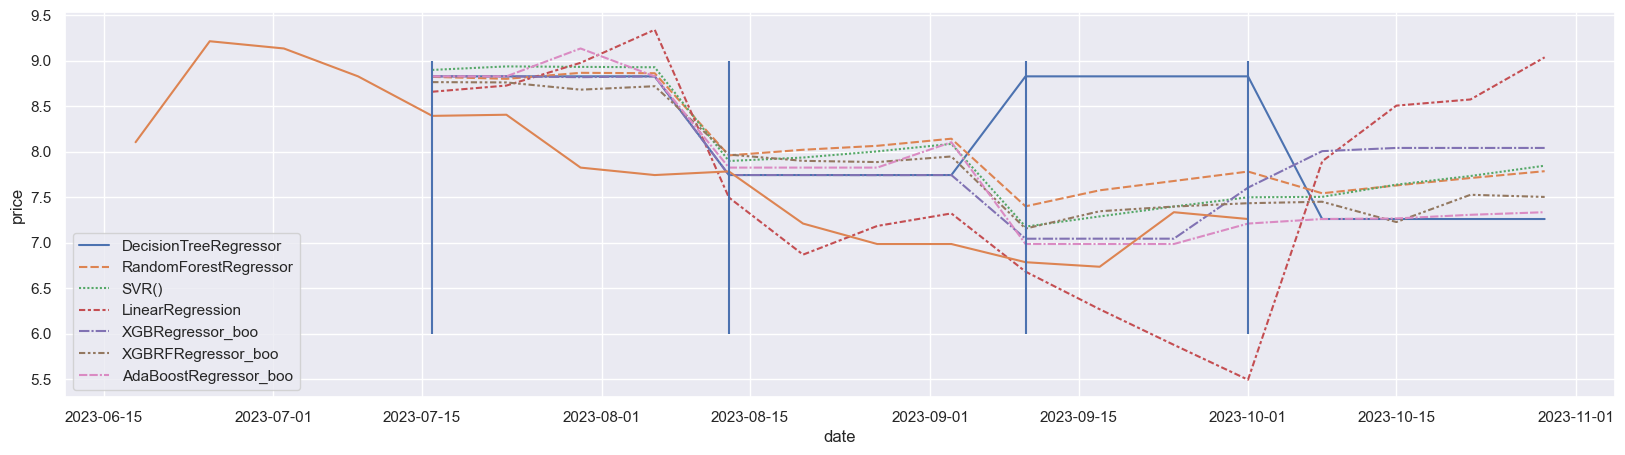

In [58]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 6
y_max = 9
sns.lineplot(df_red_outcomes[0]);
sns.lineplot(df_red[-20:-4]["price"]);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)

In [72]:

trace1=go.Line(x=df_red_outcomes[0].index,y=df_red_outcomes[0]["DecisionTreeRegressor"],name="DecisionTreeRegressor")
trace2=go.Line(x=df_red_outcomes[0].index,y=df_red_outcomes[0]["RandomForestRegressor"],name="RandomForestRegressor")
trace3=go.Line(x=df_red_outcomes[0].index,y=df_red_outcomes[0]["SVR()"],name="SVR")
trace4=go.Line(x=df_red_outcomes[0].index,y=df_red_outcomes[0]["LinearRegression"],name="LinearRegression")
trace5=go.Line(x=df_red_outcomes[0].index,y=df_red_outcomes[0]["XGBRegressor_boo"],name="XGBRegressor_")
trace6=go.Line(x=df_red_outcomes[0].index,y=df_red_outcomes[0]['AdaBoostRegressor_boo'],name="AdaBoostRegressor")
trace7=go.Line(x=df_red_outcomes[0].index,y=df_red_outcomes[0]['XGBRFRegressor_boo'],name="XGBRFRegressor")
trace8=go.Line(x=df_red[-16:-4].index,y=df_red[-20:-4]["price"],name="actual_red")
data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]

layout=dict(title='Red Popper models comparison')
fig=dict(data=data,layout=layout)
iplot(fig,filename="all red models comparison")


##### *C.3.2.2 <BR>df_green datata set*

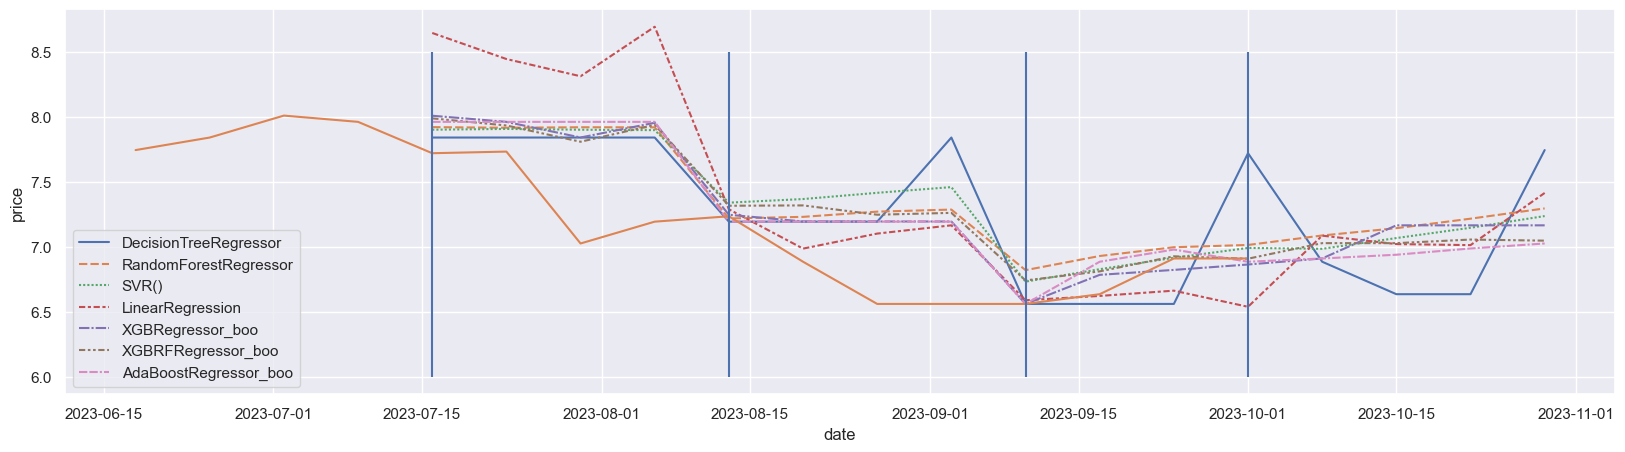

In [74]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 6
y_max = 8.5
sns.lineplot(df_green_outcomes[0]);
sns.lineplot(df_green[-20:-4]["price"]);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)

In [77]:
trace1=go.Line(x=df_green_outcomes[0].index,y=df_green_outcomes[0]["DecisionTreeRegressor"],name="DecisionTreeRegressor")
trace2=go.Line(x=df_green_outcomes[0].index,y=df_green_outcomes[0]["RandomForestRegressor"],name="RandomForestRegressor")
trace3=go.Line(x=df_green_outcomes[0].index,y=df_green_outcomes[0]["SVR()"],name="SVR")
trace4=go.Line(x=df_green_outcomes[0].index,y=df_green_outcomes[0]["LinearRegression"],name="LinearRegression")
trace5=go.Line(x=df_green_outcomes[0].index,y=df_green_outcomes[0]["XGBRegressor_boo"],name="XGBRegressor_")
trace6=go.Line(x=df_green_outcomes[0].index,y=df_green_outcomes[0]['AdaBoostRegressor_boo'],name="AdaBoostRegressor")
trace7=go.Line(x=df_green_outcomes[0].index,y=df_green_outcomes[0]['XGBRFRegressor_boo'],name="XGBRFRegressor")
trace8=go.Line(x=df_green[-16:-4].index,y=df_green[-20:-4]["price"],name="actual_green")
data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]

layout=dict(title='Green Popper models comparison')
fig=dict(data=data,layout=layout)
iplot(fig,filename="all green models comparison")

##### *C.3.2.3 <BR>df_yellow datata set*

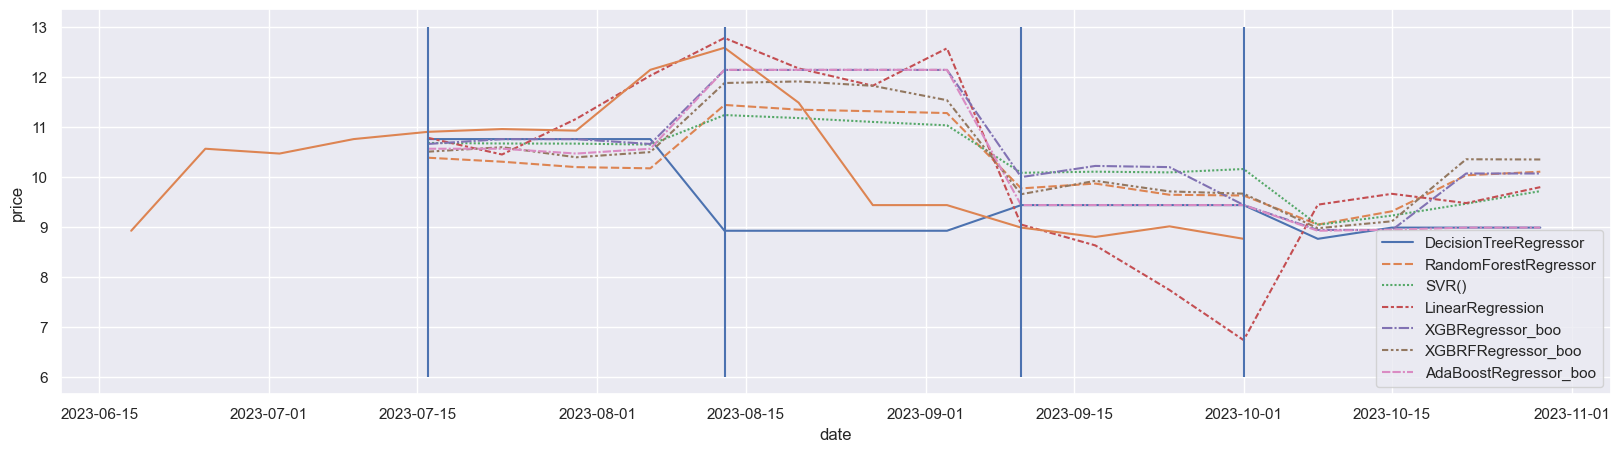

In [78]:
fig, ax = plt.subplots(figsize = (20,5));
y_min = 6 
y_max = 13
sns.lineplot(df_yellow_outcomes[0]);
sns.lineplot(df_yellow[-20:-4]["price"]);
ax.vlines(x=["2023-07-16","2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)

In [80]:
trace1=go.Line(x=df_yellow_outcomes[0].index,y=df_yellow_outcomes[0]["DecisionTreeRegressor"],name="DecisionTreeRegressor")
trace2=go.Line(x=df_yellow_outcomes[0].index,y=df_yellow_outcomes[0]["RandomForestRegressor"],name="RandomForestRegressor")
trace3=go.Line(x=df_yellow_outcomes[0].index,y=df_yellow_outcomes[0]["SVR()"],name="SVR")
trace4=go.Line(x=df_yellow_outcomes[0].index,y=df_yellow_outcomes[0]["LinearRegression"],name="LinearRegression")
trace5=go.Line(x=df_yellow_outcomes[0].index,y=df_yellow_outcomes[0]["XGBRegressor_boo"],name="XGBRegressor_")
trace6=go.Line(x=df_yellow_outcomes[0].index,y=df_yellow_outcomes[0]['AdaBoostRegressor_boo'],name="AdaBoostRegressor")
trace7=go.Line(x=df_yellow_outcomes[0].index,y=df_yellow_outcomes[0]['XGBRFRegressor_boo'],name="XGBRFRegressor")
trace8=go.Line(x=df_yellow[-16:-4].index,y=df_yellow[-20:-4]["price"],name="actual_yellow")
data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]

layout=dict(title='Yellow Popper models comparison')
fig=dict(data=data,layout=layout)
iplot(fig,filename="all yellow models comparison")

---

## *Hyperparamers tunning*

In [81]:
from hyperopt import fmin,tpe,STATUS_OK,Trials,hp

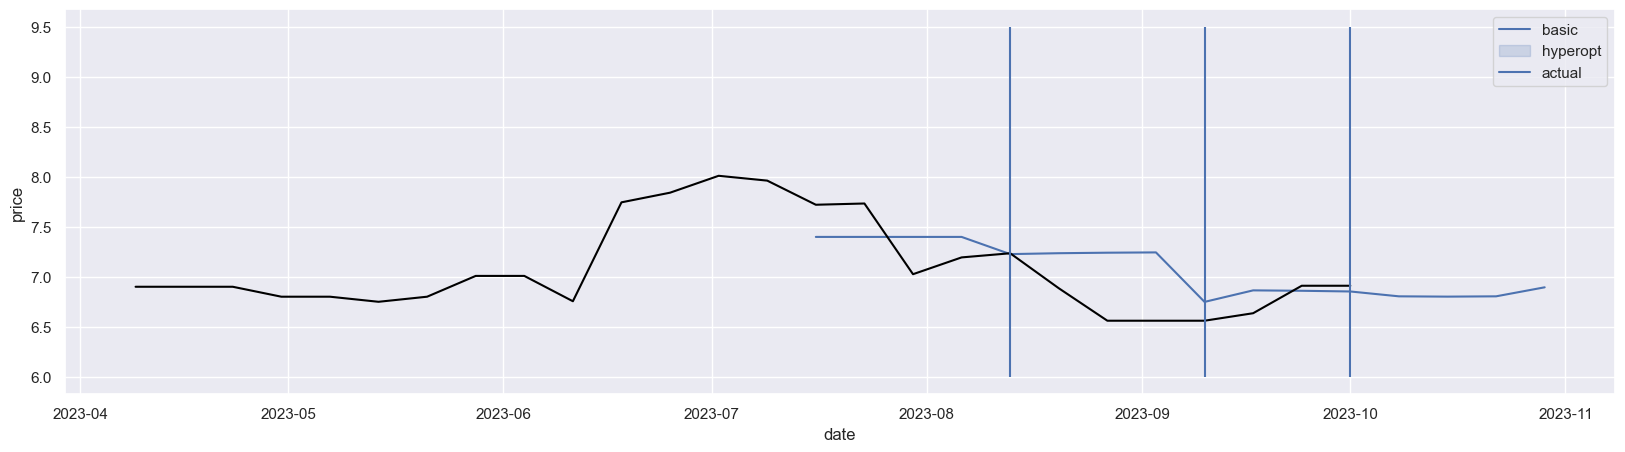

In [153]:
tscv = TimeSeriesSplit(n_splits=4,max_train_size=16,test_size=4,gap=0)
y_pred_results=[]
test_data=df_green[-20:]
time_series_data = test_data.values
for train_index, test_index in tscv.split(time_series_data):
                X_train, y_train = time_series_data[train_index, 1:], time_series_data[train_index, 0]
                X_test, y_test = time_series_data[test_index, 1:], time_series_data[test_index, 0]

                RF_Hyop=XGBRegressor(max_depth=7,
                                     eta=0.0041200023170640185,
                                     gamma=0.2717354907951306,
                                     colsample_bytree=0.8213583173601049,
                                     subsample=0.6728569987974827,                                    
                                     n_estimators=934).fit(X_train,y_train)
                 
                y_pred = RF_Hyop.predict(X_test)
                y_pred_results.append(y_pred)
                outcome=pd.DataFrame(pd.DataFrame(y_pred_results[0:4]).stack().reset_index(drop=True))
                new_date_index=pd.date_range(start="2023-07-16",end="2023-10-29",freq="W")
                new_date_index=pd.DataFrame({"date":new_date_index})
                outcome_all=pd.concat([outcome,new_date_index],axis=1).set_index("date")
                                

fig, ax = plt.subplots(figsize = (20,5));
y_min = 6 
y_max = 9.5
#sns.lineplot(df_red_outcomes[0]['XGBRegressor_boo'],legend=True,color="red");
sns.lineplot(outcome_all,legend=True,color="blue");
sns.lineplot(df_green['price'][-30:-4],legend=True,color="black");      
plt.legend(["basic","hyperopt","actual"])       
ax.vlines(x=["2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)  
fig.show()               

In [155]:
trace1=go.Line(x=outcome_all.index,y=outcome_all[0],name="hyperopt_green")
trace2=go.Line(x=df_green.index[-16:-4],y=df_green[-16:-4]['price'],name="actual_green")
data=[trace1,trace2]
layout=dict(title='Green Popper hyperopt results-XGBRegressor')
fig=dict(data=data,layout=layout)
fig = go.Figure(dict(data=data, layout=layout))
iplot(fig,filename="Green XGBRegressor hyperopt")
fig.write_html(r"C:\Users\Omar\Intern_Final_Project\Visualization\Green_XGBRegressor_hyperopt.html")

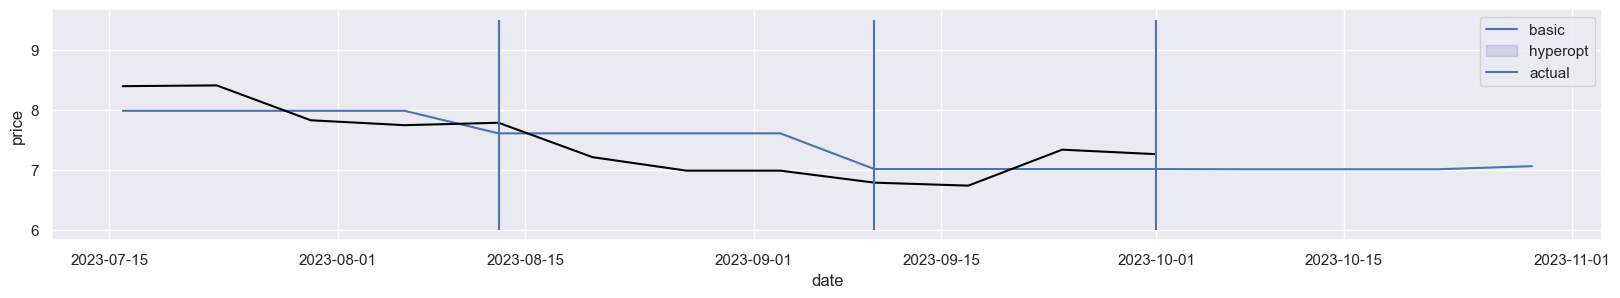

In [111]:
tscv = TimeSeriesSplit(n_splits=4,max_train_size=16,test_size=4,gap=0)
y_pred_results=[]
test_data=df_red[-20:]
time_series_data = test_data.values
for train_index, test_index in tscv.split(time_series_data):
                X_train, y_train = time_series_data[train_index, 1:], time_series_data[train_index, 0]
                X_test, y_test = time_series_data[test_index, 1:], time_series_data[test_index, 0]

                RF_Hyop=XGBRegressor(max_depth=9,
                                     eta=0.6651075477908979,
                                     gamma=0.027942846140338984,
                                     colsample_bytree=0.713767741467592,
                                     subsample=0.6939176468628331,                                    
                                     n_estimators=4).fit(X_train,y_train)
                 
                y_pred = RF_Hyop.predict(X_test)
                y_pred_results.append(y_pred)
                outcome=pd.DataFrame(pd.DataFrame(y_pred_results[0:4]).stack().reset_index(drop=True))
                new_date_index=pd.date_range(start="2023-07-16",end="2023-10-29",freq="W")
                new_date_index=pd.DataFrame({"date":new_date_index})
                outcome_all=pd.concat([outcome,new_date_index],axis=1).set_index("date")
                                

fig, ax = plt.subplots(figsize = (20,3));
y_min = 6 
y_max = 9.5
#sns.lineplot(df_red_outcomes[0]['XGBRegressor_boo'],legend=True,color="red");
sns.lineplot(outcome_all,legend=True,color="blue");
sns.lineplot(df_red['price'][-16:-4],legend=True,color="black");      
plt.legend(["basic","hyperopt","actual"])       
ax.vlines(x=["2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)  
fig.show()
                   

In [157]:
trace1=go.Line(x=outcome_all.index,y=outcome_all[0],name="hyperopt_red")
trace2=go.Line(x=df_red.index[-16:-4],y=df_red[-16:-4]['price'],name="actual_red")
data=[trace1,trace2]
layout=dict(title='Red Popper hyperopt results-XGBRegressor')
fig=dict(data=data,layout=layout)
fig = go.Figure(dict(data=data, layout=layout))
iplot(fig,filename="Red XGBRegressor hyperopt")
fig.write_html(r"C:\Users\Omar\Intern_Final_Project\Visualization\RED_XGBRegressor_hyperopt.html")

'colsample_bylevel': 0.7970993874411977, 'colsample_bynode': 0.3034067454942259, 'colsample_bytree': 0.3577563011245428, 'eta': 0.008869723475538153, 'gamma': 0.005299893212695337, 'learning_rate': 0.0001172316497515941, 'max_depth': 3.0, 'min_child_weight': 1.0, 'n_estimators': 1.0, 'subsample': 0.6187587486829111

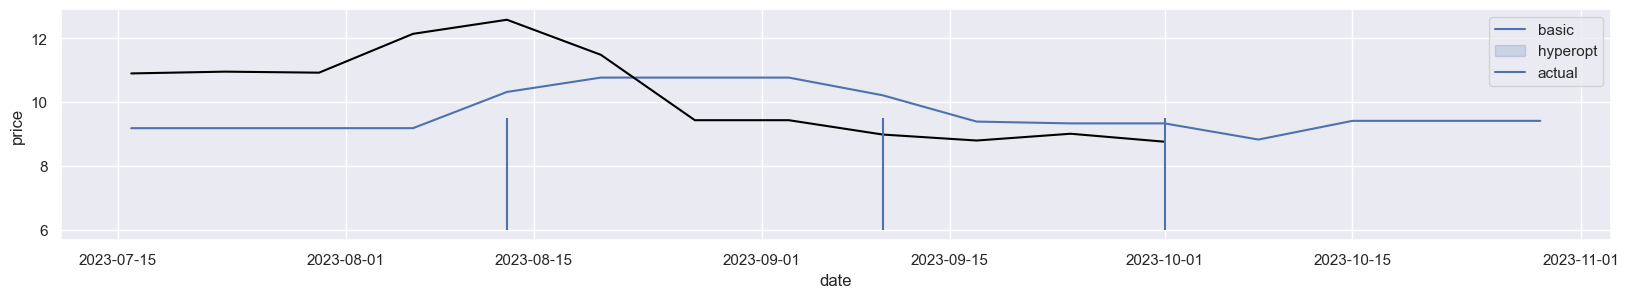

In [159]:
tscv = TimeSeriesSplit(n_splits=4,max_train_size=16,test_size=4,gap=0)
y_pred_results=[]
test_data=df_yellow[-20:]
time_series_data = test_data.values
for train_index, test_index in tscv.split(time_series_data):
                X_train, y_train = time_series_data[train_index, 1:], time_series_data[train_index, 0]
                X_test, y_test = time_series_data[test_index, 1:], time_series_data[test_index, 0]

                RF_Hyop=XGBRegressor(max_depth=5,
                                     eta=0.7040608738805098,
                                     gamma=0.0012480258646070386,
                                     colsample_bytree=0.9414160083547407,
                                     subsample=0.6939176468628331,                                    
                                     n_estimators=4).fit(X_train,y_train)
                 
                y_pred = RF_Hyop.predict(X_test)
                y_pred_results.append(y_pred)
                outcome=pd.DataFrame(pd.DataFrame(y_pred_results[0:4]).stack().reset_index(drop=True))
                new_date_index=pd.date_range(start="2023-07-16",end="2023-10-29",freq="W")
                new_date_index=pd.DataFrame({"date":new_date_index})
                outcome_all=pd.concat([outcome,new_date_index],axis=1).set_index("date")
                                

fig, ax = plt.subplots(figsize = (20,3));
y_min = 6 
y_max = 9.5
#sns.lineplot(df_red_outcomes[0]['XGBRegressor_boo'],legend=True,color="red");
sns.lineplot(outcome_all,legend=True,color="blue");
sns.lineplot(df_yellow['price'][-16:-4],legend=True,color="black");      
plt.legend(["basic","hyperopt","actual"])       
ax.vlines(x=["2023-08-13","2023-09-10","2023-10-01"],ymax=y_max,ymin=y_min)  
fig.show()
                   

In [161]:
trace1=go.Line(x=outcome_all.index,y=outcome_all[0],name="hyperopt_Yellow")
trace2=go.Line(x=df_yellow.index[-16:-4],y=df_yellow[-16:-4]['price'],name="actual_Yellow")
data=[trace1,trace2]
layout=dict(title='Yellow Popper hyperopt results-XGBRegressor')
fig=dict(data=data,layout=layout)
fig = go.Figure(dict(data=data, layout=layout))
iplot(fig,filename="Yellow XGBRegressor hyperopt")
fig.write_html(r"C:\Users\Omar\Intern_Final_Project\Visualization\Yellow_XGBRegressor_hyperopt.html")